In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal
from scipy.stats import chi2, ncx2
from scipy import special

Text(0, 0.5, 'Doppler Shift [Hz]')

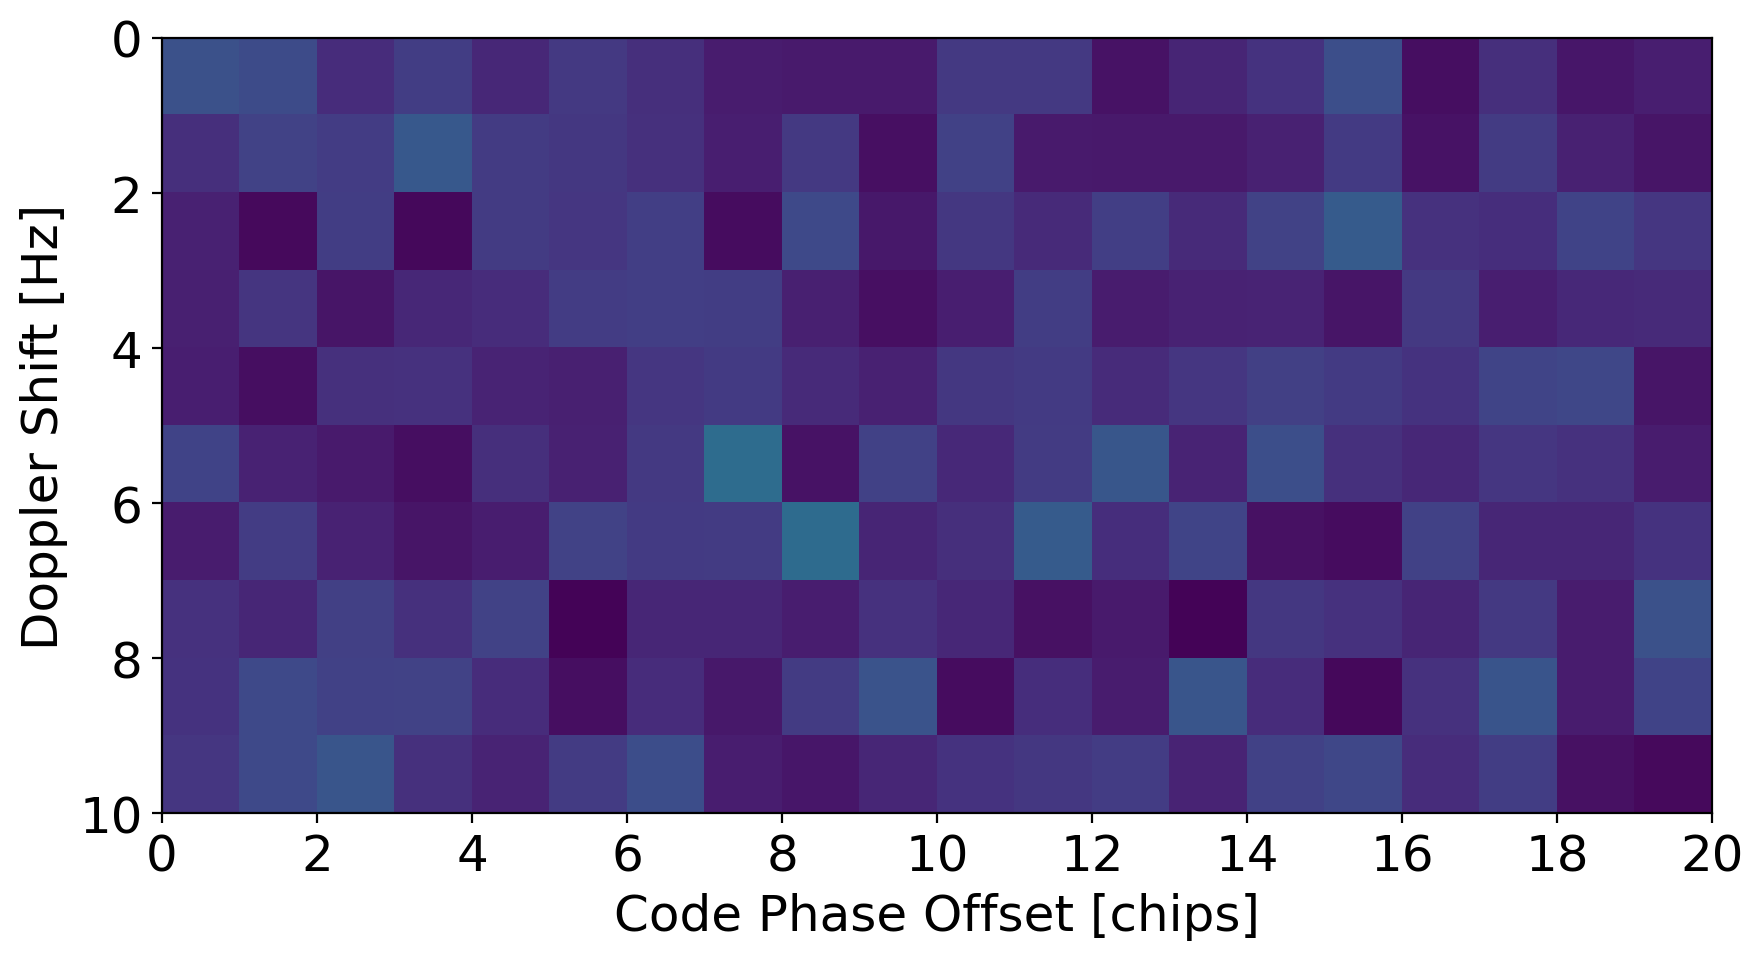

In [2]:
fig = plt.figure(figsize=(10, 6), dpi=200)
plt.rcParams.update({"font.size": 18})
ax = fig.add_subplot(1, 1, 1)
corr_shape = (10, 20)
mock_corr = np.random.randn(corr_shape[0], corr_shape[1]) + 1j * np.random.randn(corr_shape[0], corr_shape[1])
# mock_corr[4, 12] += 10  # Add a peak
im = ax.imshow(np.abs(mock_corr), extent=(0, corr_shape[1], corr_shape[0], 0), vmin=0, vmax=10)
ax.set_xticks(np.arange(0, corr_shape[1]+1, 2))
ax.set_xlabel("Code Phase Offset [chips]")
ax.set_ylabel("Doppler Shift [Hz]")

/tmp/ipykernel_14875/3142018106.py:53: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


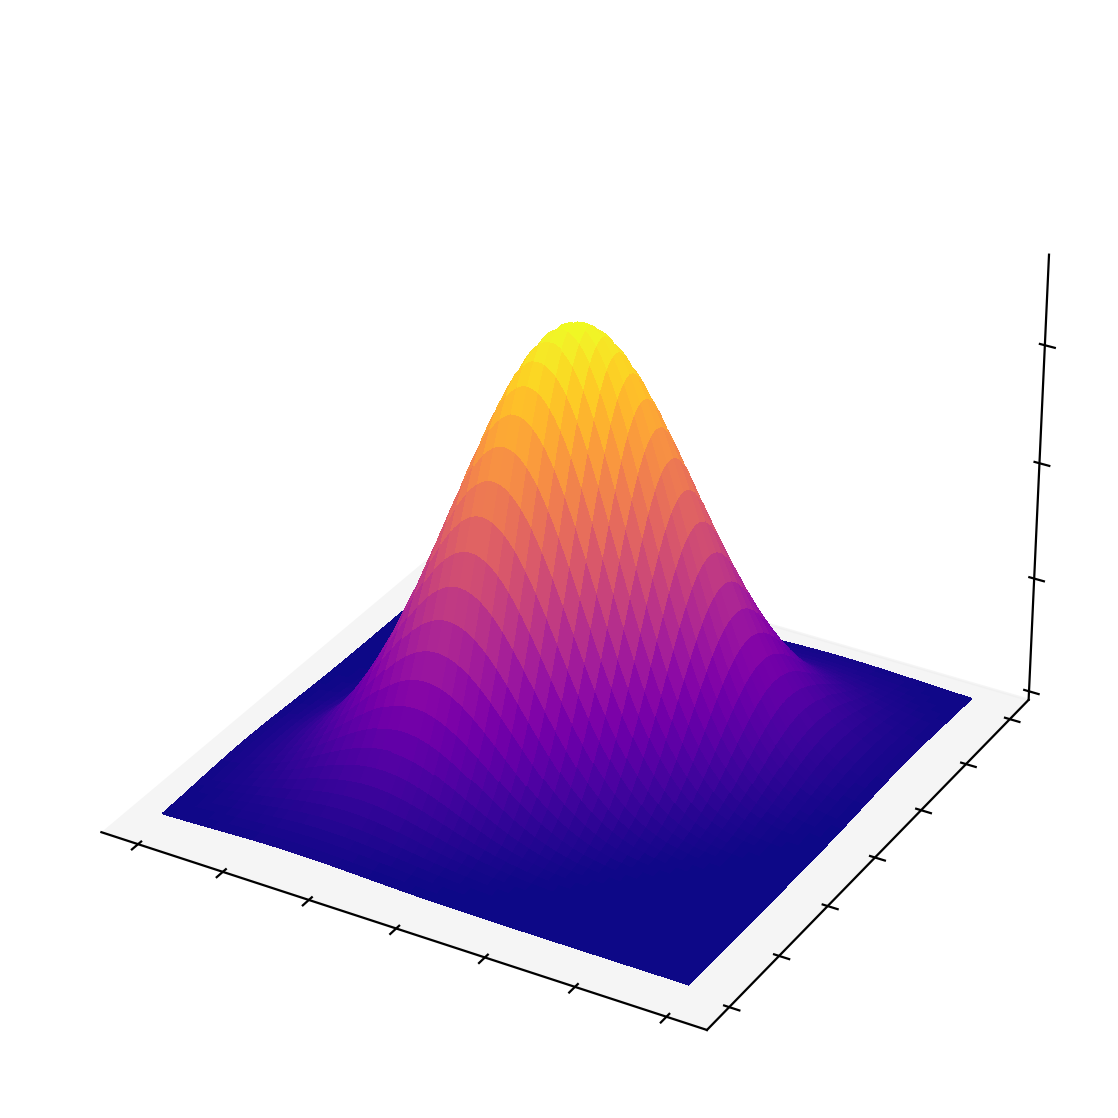

In [3]:
# make joint normal random pdf in 3D

from mpl_toolkits.mplot3d import Axes3D # For 3D surface plot

# 1. Define the parameters of the 2D joint normal distribution
mean = np.array([0, 0])  # Mean vector (mu_x, mu_y)
covariance = np.array([[1, 0.5],
                       [0.5, 1]]) # Covariance matrix

# 2. Create a grid of points for the X and Y axes
N = 1000 # Number of points in each dimension
x = np.linspace(-3, 3, N)
y = np.linspace(-3, 3, N)
X, Y = np.meshgrid(x, y) # Create a 2D grid

# 3. Combine X and Y into a single array of coordinates
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# 4. Create a multivariate normal distribution object
rv = multivariate_normal(mean, covariance)

# 5. Calculate the PDF values for each point on the grid
Z = rv.pdf(pos)

# 6. Plot the 2D joint normal PDF
fig = plt.figure(figsize=(10, 7), dpi=200)
ax = fig.add_subplot(111, projection="3d")

# Create a 3D surface plot
ax.plot_surface(X, Y, Z, cmap="plasma", antialiased=False, edgecolor="none", alpha=1.0)
# ax.set_xlabel("$X_1$")
# ax.set_ylabel("$X_2$")
# ax.set_zlabel("pdf($X_1, X_2$)")
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.gridlines.set_visible(False)
ax.xaxis.gridlines.set_visible(False)
ax.zaxis.gridlines.set_visible(False)
# ax.zaxis.set_ticks([])
# ax.set_zticks([])
for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
    axis.set_ticklabels([])
#     axis._axinfo["axisline"]["linewidth"] = 1
#     axis._axinfo["axisline"]["color"] = "b"
#     axis._axinfo["grid"]["linewidth"] = 0.5
#     axis._axinfo["grid"]["linestyle"] = "--"
#     axis._axinfo["grid"]["color"] = "#d1d1d1"
#     axis._axinfo["tick"]["inward_factor"] = 0.0
#     axis._axinfo["tick"]["outward_factor"] = 0.0
    # axis.set_pane_color((0, 0, 0))
plt.tight_layout()
plt.show()

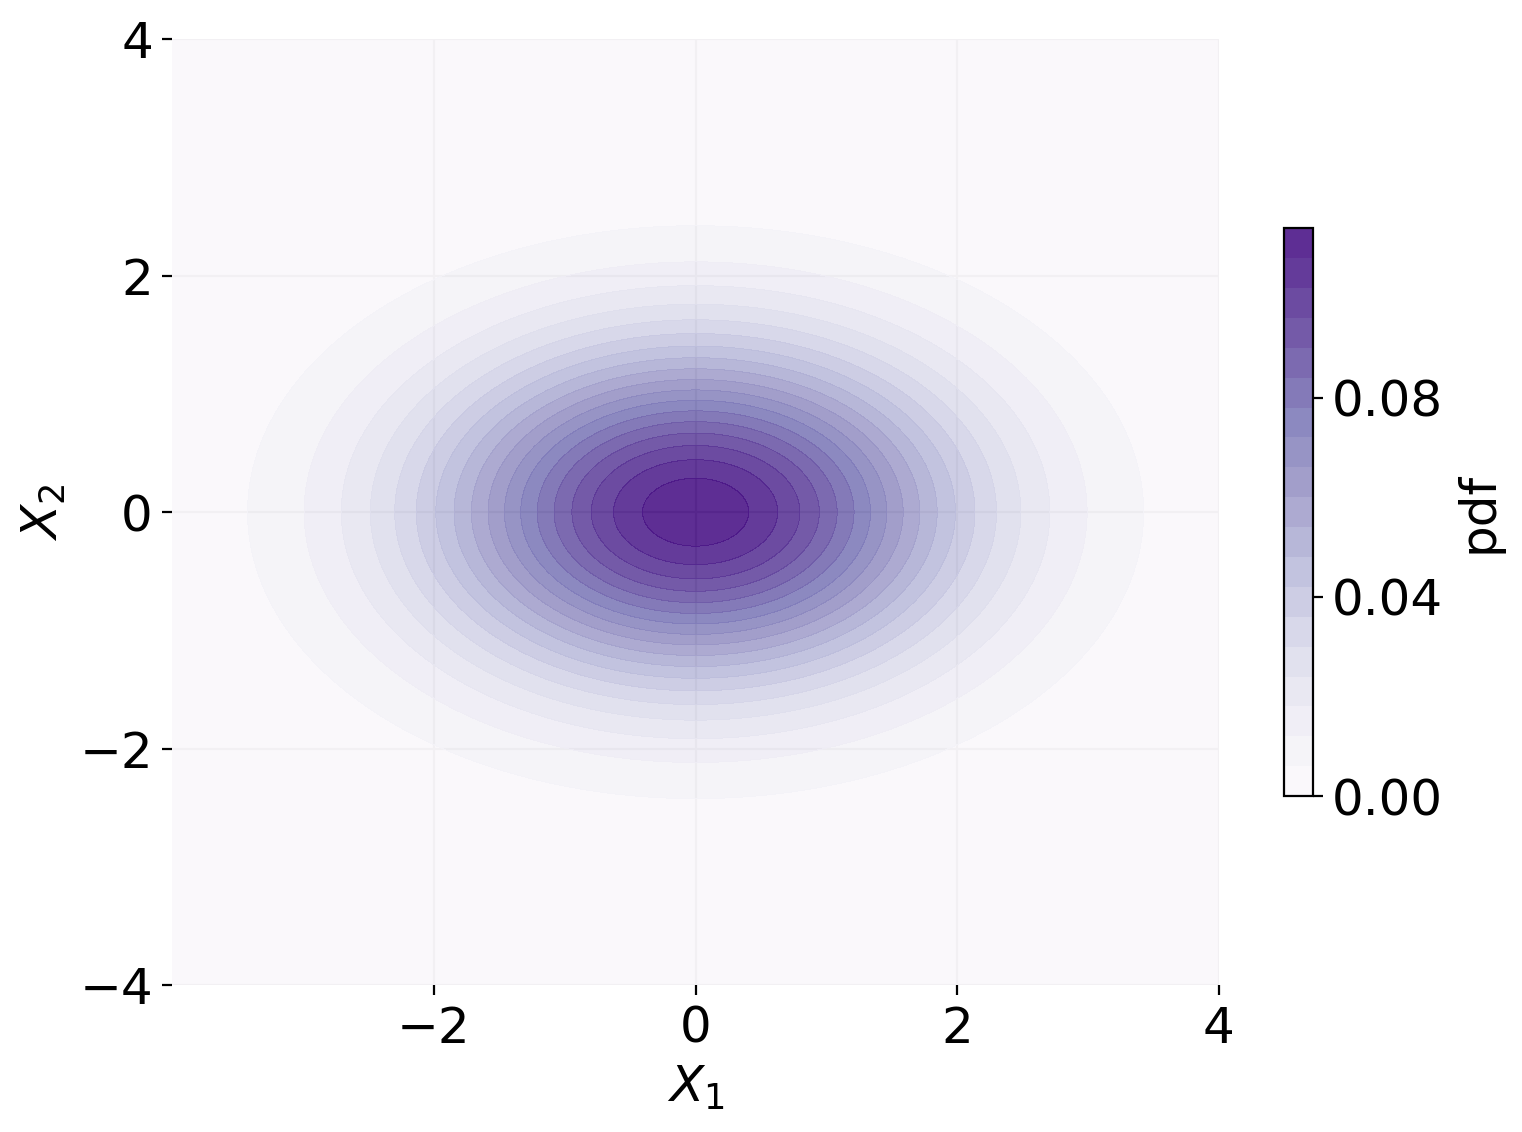

In [4]:
mean = np.array([0, 0])  # Mean vector (mu_x, mu_y)
covariance = np.array([[2, 0.0],
                       [0.0, 1]])
# covariance = np.array([[2, 0.7],
#                        [0.7, 1]])

# 2. Create a grid of points for the X and Y axes
N = 1000 # Number of points in each dimension
x = np.linspace(-4, 4, N)
y = np.linspace(-4, 4, N)
X, Y = np.meshgrid(x, y) # Create a 2D grid

# 3. Combine X and Y into a single array of coordinates
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# 4. Create a multivariate normal distribution object
rv = multivariate_normal(mean, covariance)

# 5. Calculate the PDF values for each point on the grid
Z = rv.pdf(pos)

# Plot contour of the 2D joint normal PDF
fig = plt.figure(figsize=(8, 6), dpi=200)
ax = fig.add_subplot(111)
contour = ax.contourf(X, Y, Z, levels=20, cmap="Purples", vmin=-0, vmax=.12, zorder=2, alpha=.9)
ax.set_xlabel("$X_1$")
ax.set_ylabel("$X_2$")
ax.set_yticks([-4, -2, 0, 2, 4])
ax.set_xticks([-2, 0, 2, 4])
for sp in ax.spines.values():
    sp.set_visible(False)
ax.grid(zorder=1)
cb = plt.colorbar(contour, ax=ax, label="pdf", shrink=0.6)
cb.set_ticks([0, 0.04, 0.08])
# cb.set_ticks([0, 0.04, 0.08, 0.12])
# ax.text(0.1, 0.8, transform=ax.transAxes, fontsize=22)
plt.tight_layout()
plt.show()

In [5]:
# samples = ...
# np.mean(samples)
# np.var(samples)

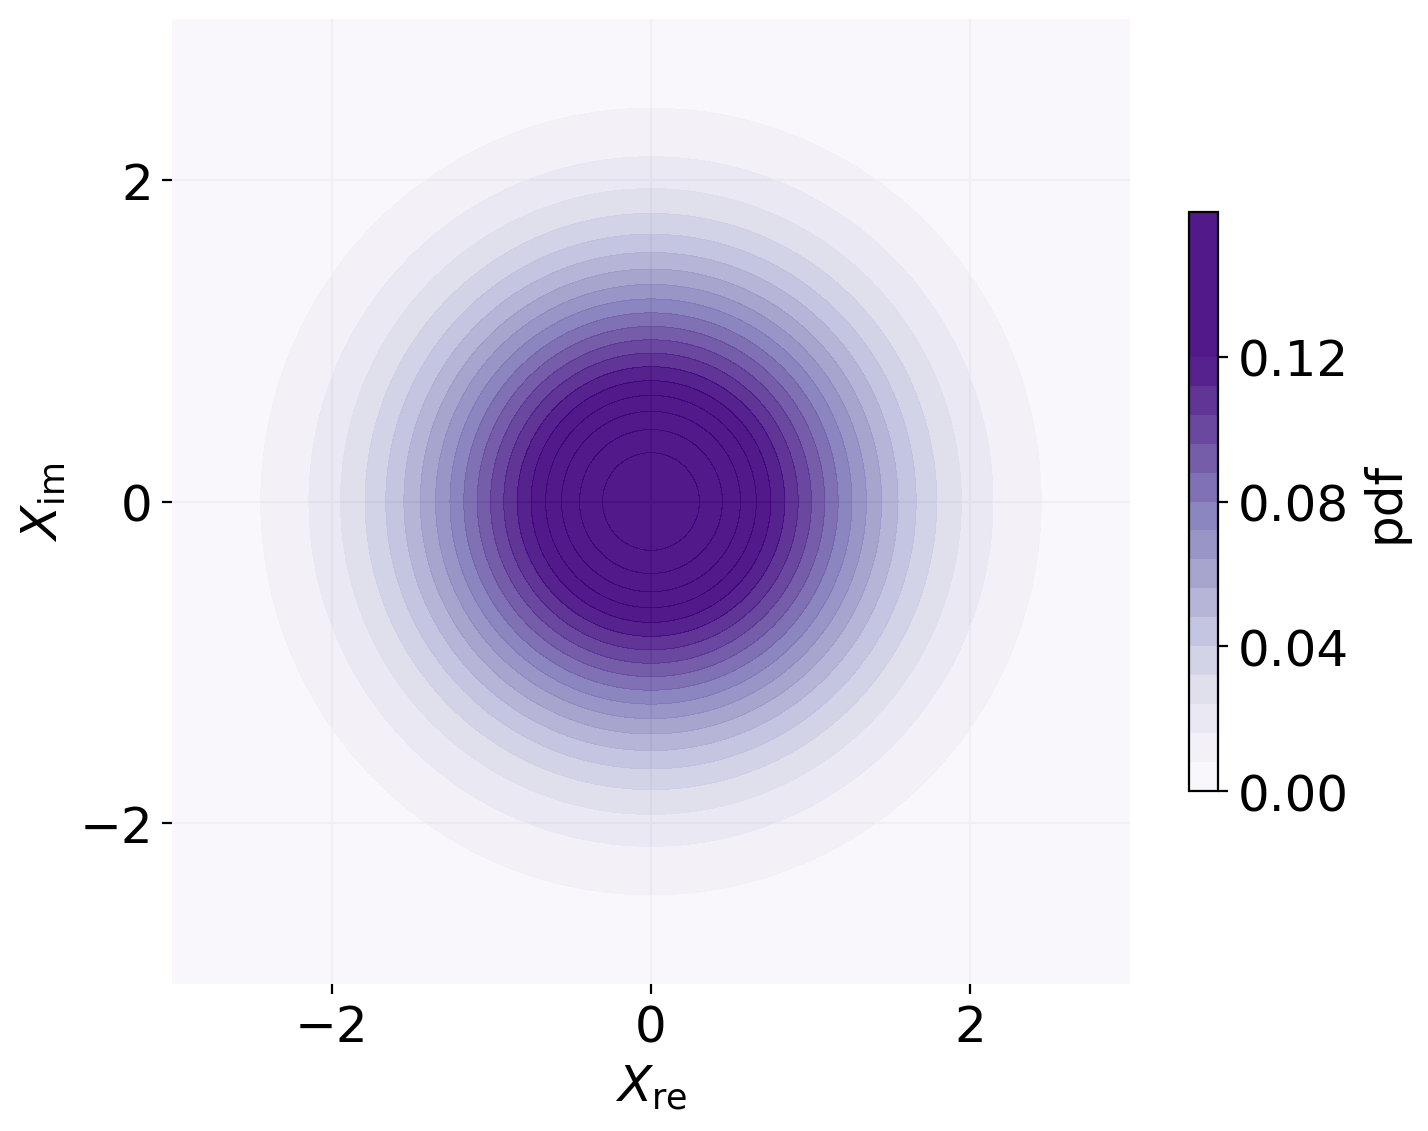

In [6]:
mean = np.array([0, 0])  # Mean vector (mu_x, mu_y)
covariance = np.array([[1, 0.0],
                       [0.0, 1]])

# 2. Create a grid of points for the X and Y axes
N = 1000 # Number of points in each dimension
x = np.linspace(-3, 3, N)
y = np.linspace(-3, 3, N)
X, Y = np.meshgrid(x, y) # Create a 2D grid

# 3. Combine X and Y into a single array of coordinates
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# 4. Create a multivariate normal distribution object
rv = multivariate_normal(mean, covariance)

# 5. Calculate the PDF values for each point on the grid
Z = rv.pdf(pos)

# Plot contour of the 2D joint normal PDF
fig = plt.figure(figsize=(7.5, 6), dpi=200)
ax = fig.add_subplot(111)
contour = ax.contourf(X, Y, Z, levels=20, cmap="Purples", vmin=-0, vmax=.12, zorder=2, alpha=.9)
ax.set_xlabel("$X_\\text{re}$")
ax.set_ylabel("$X_\\text{im}$")
ax.set_yticks([-2, 0, 2])
ax.set_xticks([-2, 0, 2])
for sp in ax.spines.values():
    sp.set_visible(False)
ax.grid(zorder=1)
cb = plt.colorbar(contour, ax=ax, label="pdf", shrink=0.6)
# cb.set_ticks([0, 0.04, 0.08])
cb.set_ticks([0, 0.04, 0.08, 0.12])
# ax.text(0.1, 0.8, transform=ax.transAxes, fontsize=22)
plt.tight_layout()
plt.show()

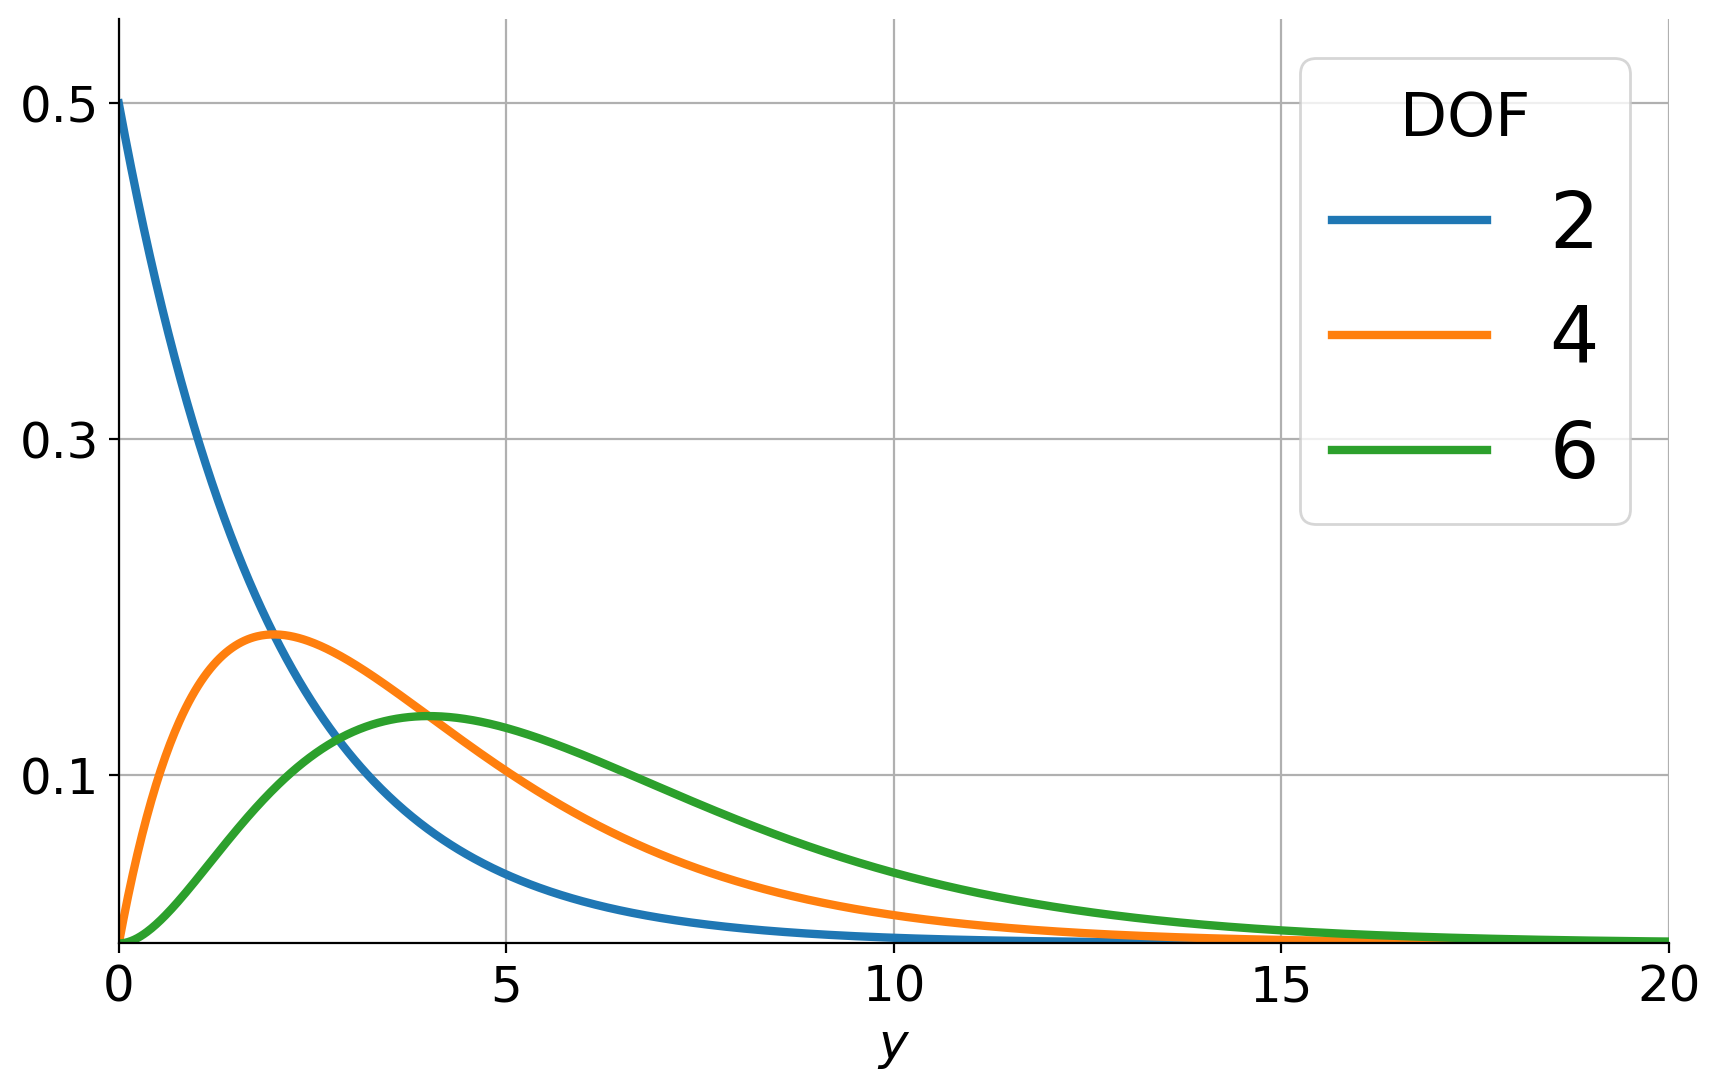

In [7]:
# Plot chi-squared distribution with 2, 4, and 6 degrees of freedom

df_values = [2, 4, 6]  # Degrees of freedom
x = np.linspace(0, 20, 1000)
plt.rcParams.update({"font.size": 18})
fig = plt.figure(figsize=(10, 6), dpi=200)
ax = fig.add_subplot(1, 1, 1)
for df in df_values:
    ax.plot(x, chi2.pdf(x, df), label=f"{df}", lw=3)
# ax.set_title("Chi-Squared Distribution")
ax.set_xlabel("$y$")
ax.set_xticks([0, 5, 10, 15, 20])
ax.set_yticks([0.1, 0.3, 0.5])
ax.set_ylim(0, 0.55)
ax.set_xlim(0, 20)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
# ax.set_ylabel("Probability Density Function (pdf)")
leg = ax.legend(fontsize=28)
leg.set_title("DOF", prop={"size": 22})
ax.grid()
plt.show()

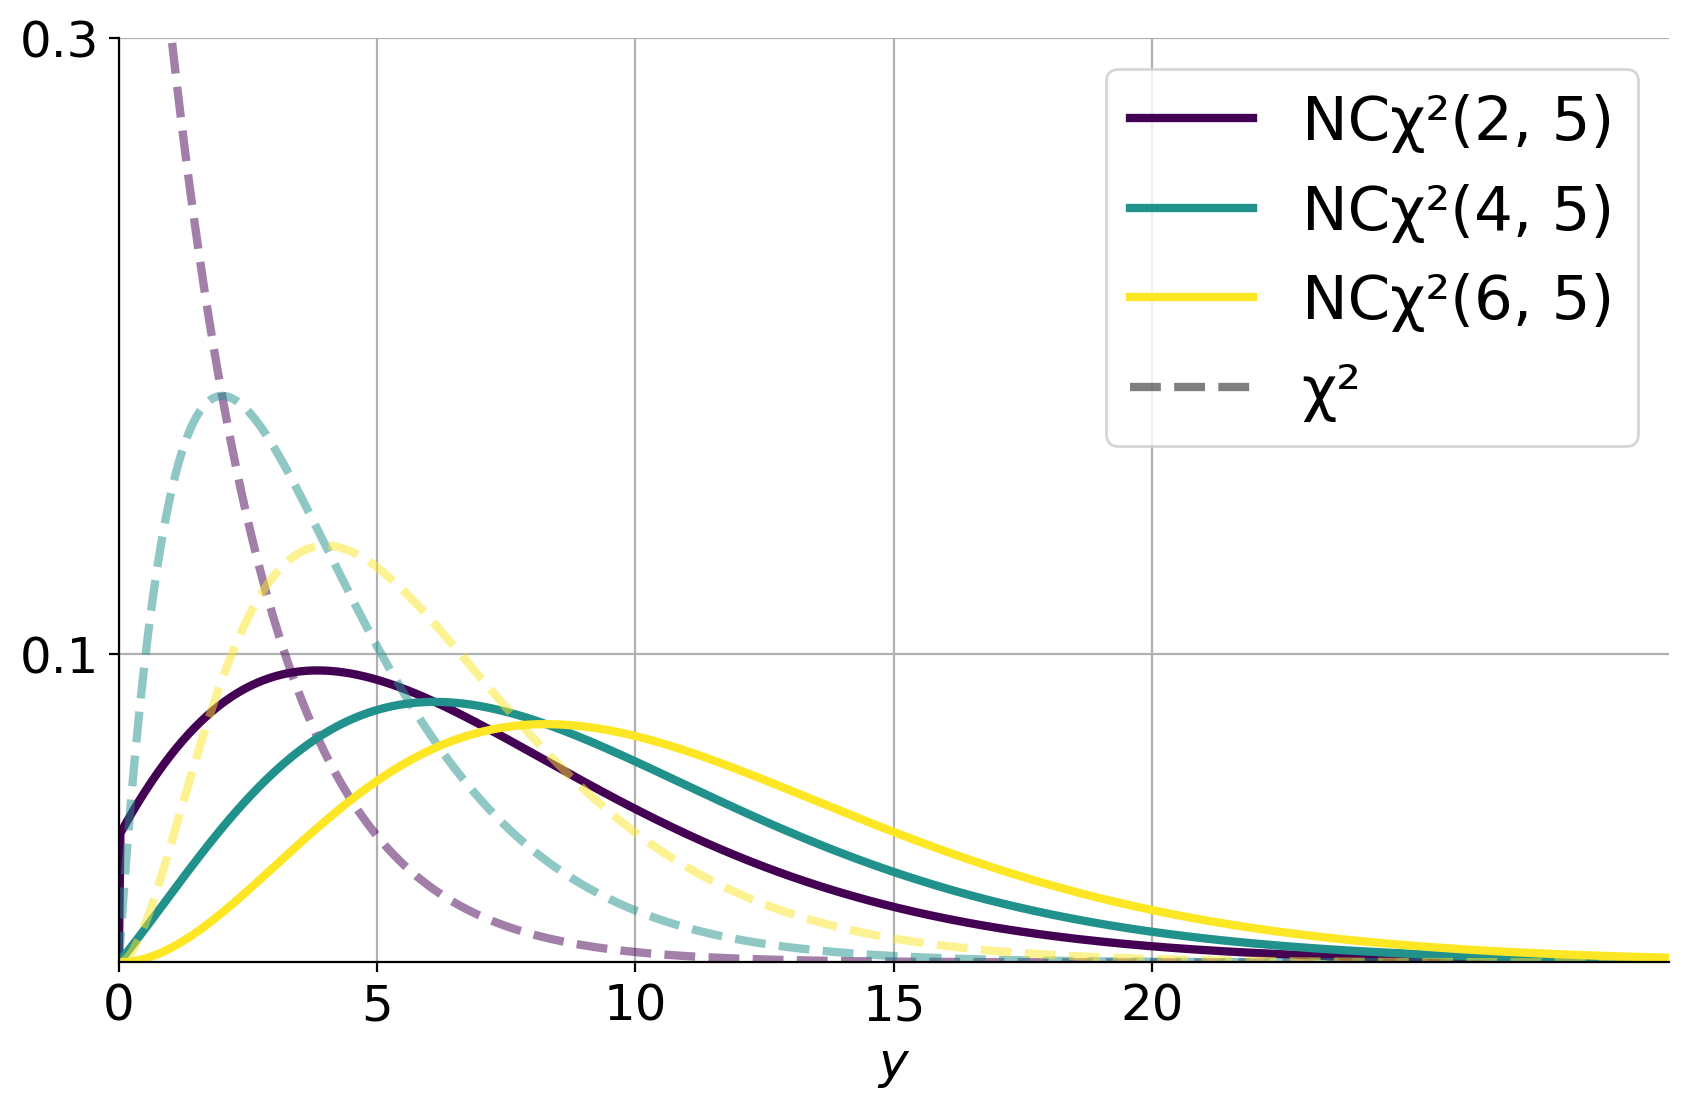

In [8]:
# plot chi-squared with 2 DOF and non-central chi-squared

df_list = [2, 4, 6]  # Degrees of freedom
lambda_param = 5  # Non-centrality parameter
x = np.linspace(0, 30, 1000)

fig = plt.figure(figsize=(10, 6), dpi=200)
ax = fig.add_subplot(1, 1, 1)
plt.rcParams.update({"font.size": 18})
# ax.plot(x, chi2.pdf(x, df), label=f"λ=0", lw=3)
cmap = plt.get_cmap("viridis")
colors = cmap(np.linspace(0, 1, len(df_list)))
for i, df in enumerate(df_list):
    color = colors[i]
    ax.plot(x, chi2.pdf(x, df), color=color, linestyle="--", alpha=.5, lw=3)
    ax.plot(x, ncx2.pdf(x, df, lambda_param), color=color, lw=3)
ax.set_xlabel("$y$")
ax.set_xticks([0, 5, 10, 15, 20])
ax.set_yticks([0.1, 0.3, 0.5])
ax.set_ylim(0, 0.3)
ax.set_xlim(0, 30)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
# ax.set_ylabel("Probability Density Function (pdf)")
handles = [plt.Line2D([0], [0], color=colors[i], lw=3) for i in range(len(df_list))]
handles += [plt.Line2D([0], [0], color="black", lw=3, linestyle="--", alpha=.5)]
labels = [f"NCχ²({df}, 5)" for df in df_list]
labels += ["χ²"]
leg = ax.legend(handles, labels, fontsize=22)
ax.grid()
plt.show()

Threshold for Pfd=0.05: 15.51
Probability of Detection Pd=0.915


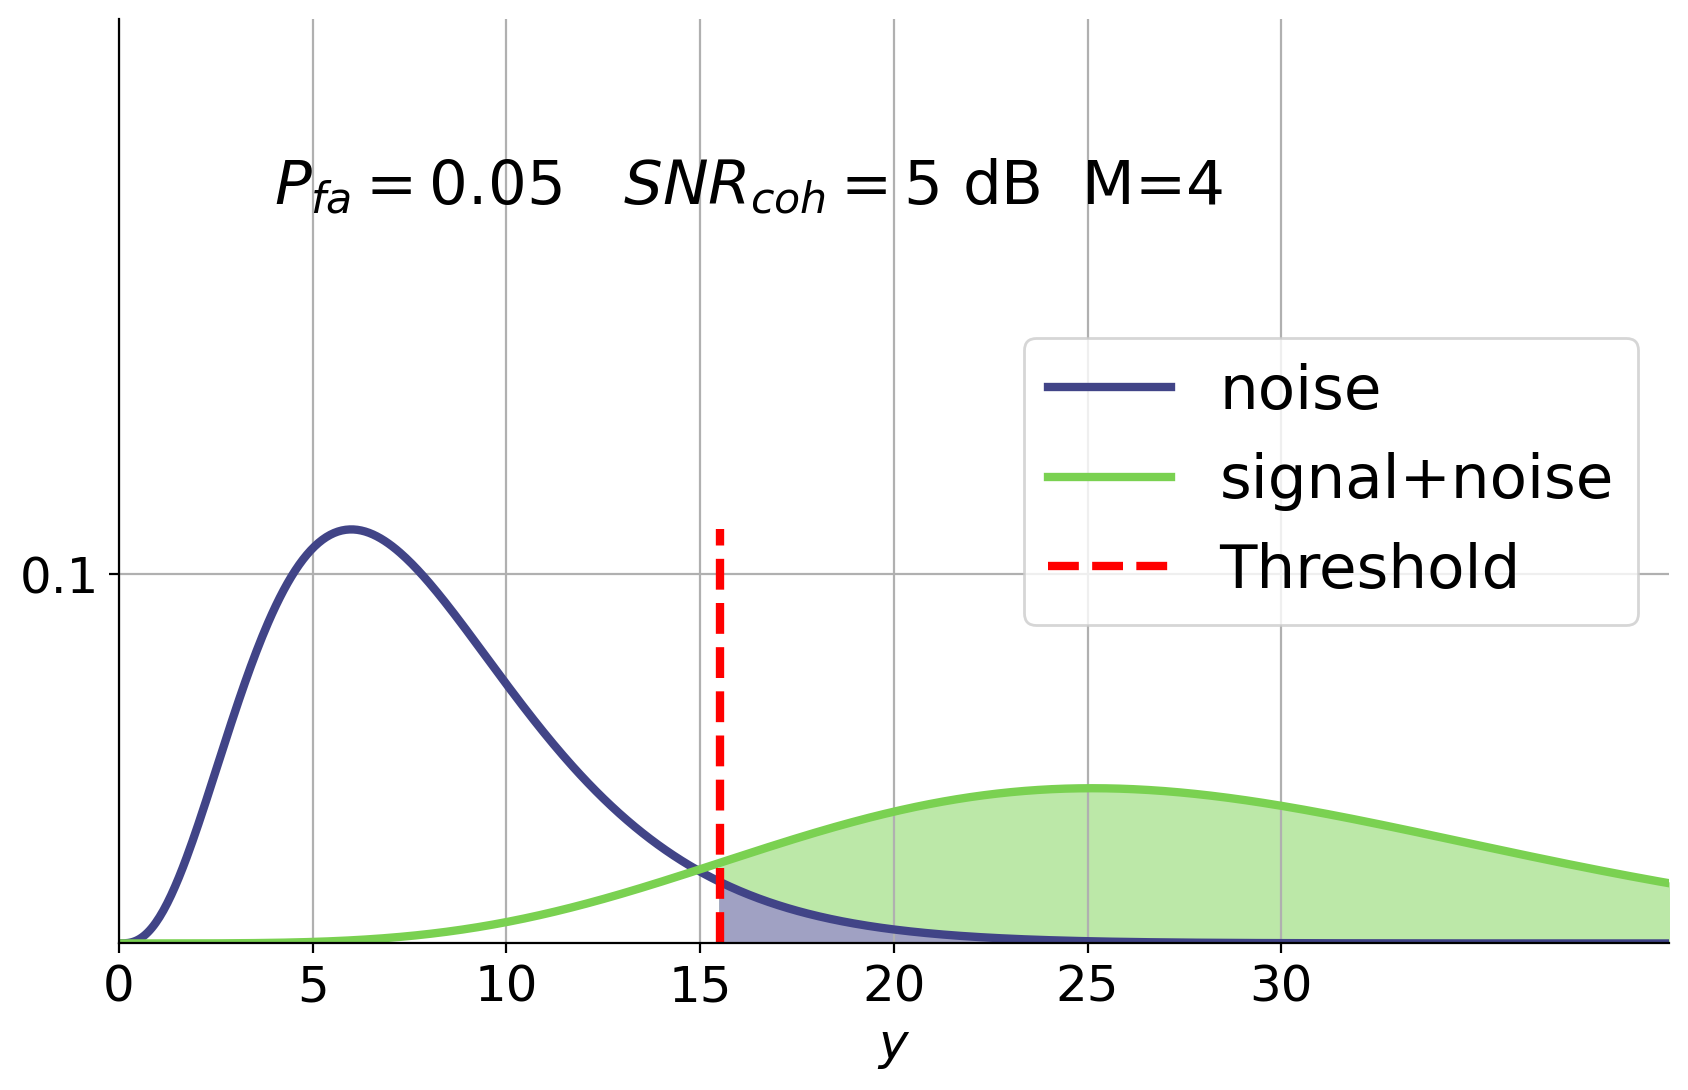

In [9]:
# plot chi-squared with 2 DOF and non-central chi-squared
M = 4
SNR_coh = 5  # Coherent SNR
df = 2 * M  # Degrees of freedom
lambda_param = M * SNR_coh  # Non-centrality parameter
x = np.linspace(0, 50, 1000)

noise_pdf = chi2.pdf(x, df)
signal_plus_noise_pdf = ncx2.pdf(x, df, lambda_param)
p_fd = .05
threshold = chi2.ppf(1 - p_fd, df)
print(f"Threshold for Pfd={p_fd}: {threshold:.2f}")
p_d = 1 - ncx2.cdf(threshold, df, lambda_param)
print(f"Probability of Detection Pd={p_d:.3f}")


fig = plt.figure(figsize=(10, 6), dpi=200)
ax = fig.add_subplot(1, 1, 1)
plt.rcParams.update({"font.size": 18})
cmap = plt.get_cmap("viridis")
colors = cmap([.2, .8])
def lighten_color(color, amount=.5):
    return np.array(color) + (1 - np.array(color)) * amount
light_colors = [lighten_color(c) for c in colors]

ax.fill_between(x, 0, signal_plus_noise_pdf, where=(x >= threshold), color=light_colors[1], alpha=1)
ax.fill_between(x, 0, noise_pdf, where=(x >= threshold), color=light_colors[0], alpha=1)
ax.plot(x, noise_pdf, label=f"noise", color=colors[0], lw=3)
ax.plot(x, signal_plus_noise_pdf, label=f"signal+noise", color=colors[1], lw=3)
ax.plot([threshold, threshold], [0, np.max(noise_pdf)], color="red", linestyle="--", lw=3, label="Threshold")
ax.text(.1, .8, f"$P_{{fa}}={p_fd}$   $SNR_{{coh}}={SNR_coh}$ dB  M={M}", transform=ax.transAxes, fontsize=22)
ax.set_xlabel("$y$")
ax.set_xticks([0, 5, 10, 15, 20, 25, 30])
ax.set_yticks([0.1, 0.3, 0.5])
ax.set_ylim(0, 0.25)
ax.set_xlim(0, 40)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
# ax.set_ylabel("Probability Density Function (pdf)")
leg = ax.legend(fontsize=22)
ax.grid()
plt.show()

Threshold for Pfa=1e-06: 27.63
Threshold for Pfa=0.0001: 18.42
Threshold for Pfa=0.01: 9.21
Threshold for Pfa=1e-06: 65.42
Threshold for Pfa=0.0001: 52.39
Threshold for Pfa=0.01: 37.57


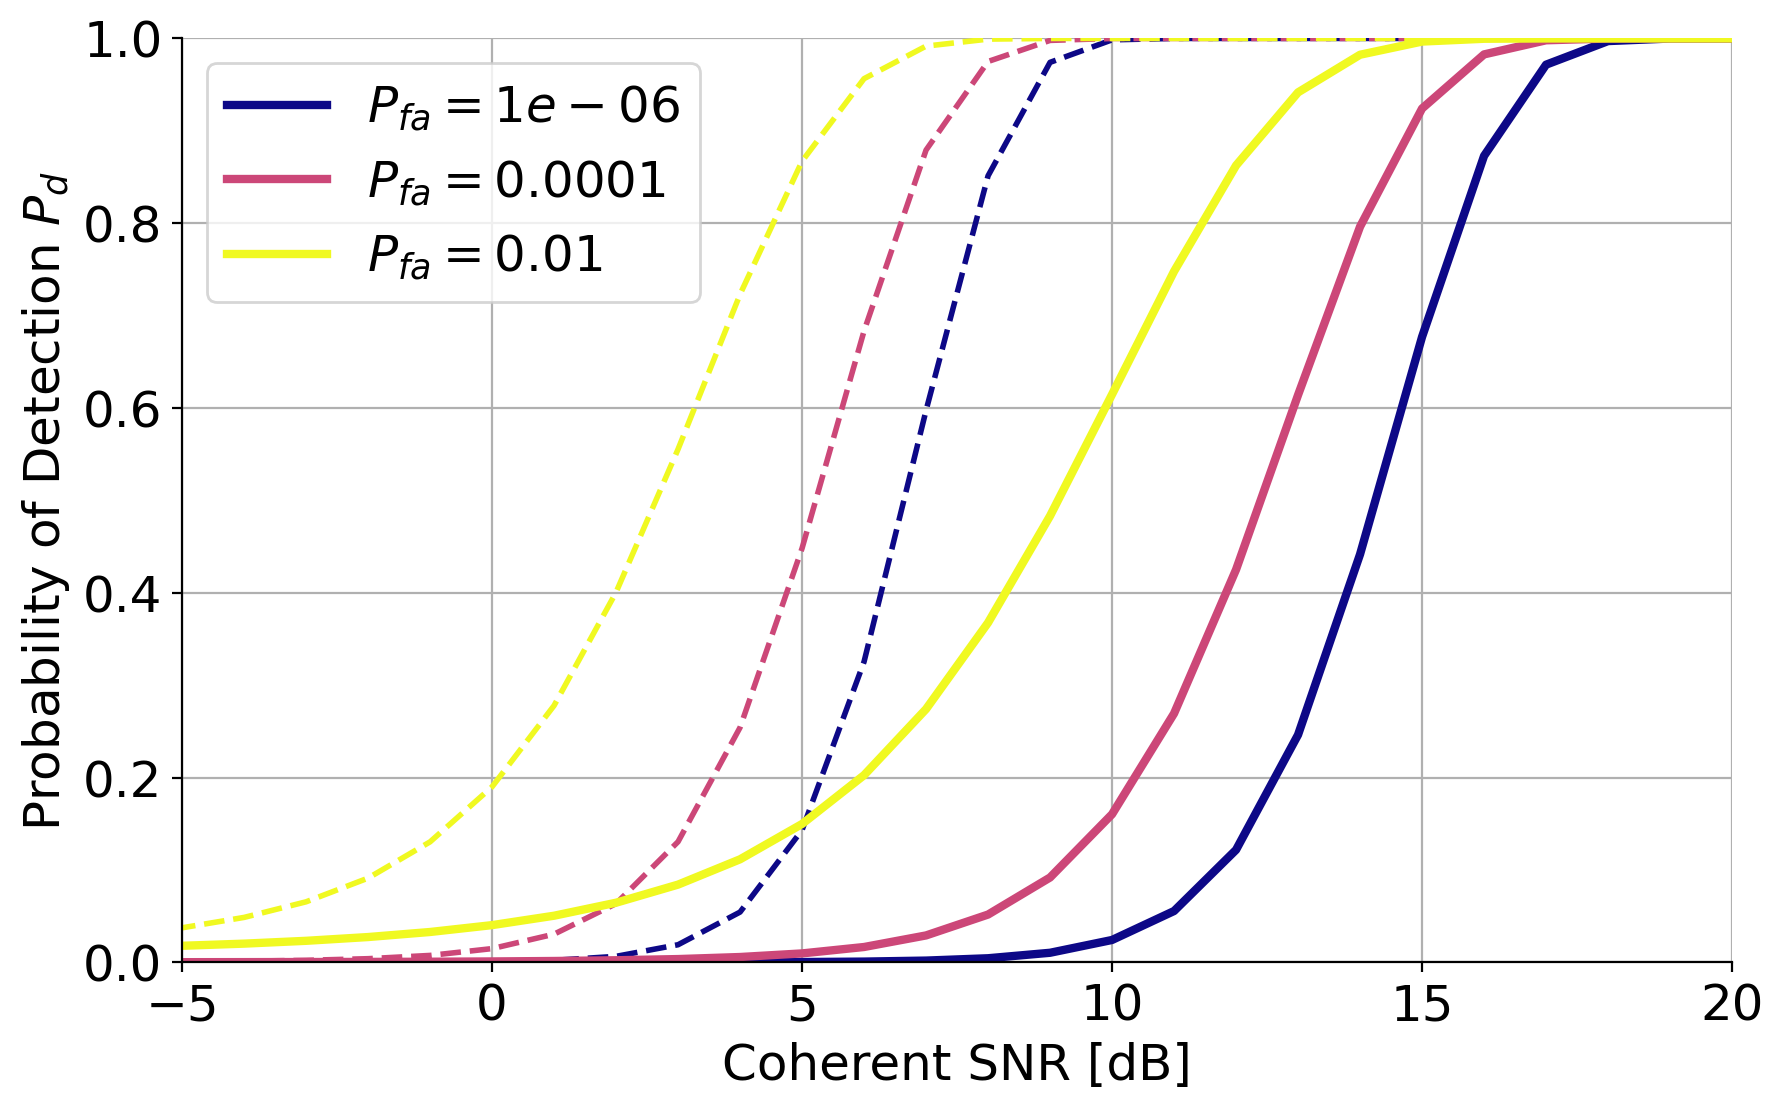

In [14]:
# probability of detection vs coherent SNR for default M = 1, p_fd = 0.05

SNR_coh_dB_arr = np.arange(-20, 50.2, 1.0)
p_fa_arr = np.array([1e-6, 1e-4, 0.01])

p_d_coh_arr = np.zeros((len(p_fa_arr), len(SNR_coh_dB_arr)))

for i, p_fa in enumerate(p_fa_arr):
    threshold = chi2.ppf(1 - p_fa, 2)  # for M = 1
    print(f"Threshold for Pfa={p_fa}: {threshold:.2f}")
    for j, SNR_coh_dB in enumerate(SNR_coh_dB_arr):
        SNR_coh = 10 ** (SNR_coh_dB / 10)
        lambda_param = 1 * SNR_coh  # M = 1
        p_d_coh_arr[i, j] = 1 - ncx2.cdf(threshold, 2, lambda_param)

p_d_ncoh_arr = np.zeros((len(p_fa_arr), len(SNR_coh_dB_arr)))
M = 10
for i, p_fa in enumerate(p_fa_arr):
    threshold = chi2.ppf(1 - p_fa, 2 * M)  # for M = 1
    print(f"Threshold for Pfa={p_fa}: {threshold:.2f}")
    for j, SNR_coh_dB in enumerate(SNR_coh_dB_arr):
        SNR_coh = 10 ** (SNR_coh_dB / 10)
        lambda_param = M * SNR_coh  # M = 1
        p_d_ncoh_arr[i, j] = 1 - ncx2.cdf(threshold, 2 * M, lambda_param)


fig = plt.figure(figsize=(10, 6), dpi=200)
ax = fig.add_subplot(1, 1, 1)
plt.rcParams.update({"font.size": 18})
cmap = plt.get_cmap("plasma")
colors = cmap(np.linspace(0, 1, len(p_fa_arr)))
for i, p_fa in enumerate(p_fa_arr):
    p_d = p_d_coh_arr[i, :]
    ax.plot(SNR_coh_dB_arr, p_d, lw=3, color=colors[i], label=f"$P_{{fa}}={p_fa}$")
    ax.plot(SNR_coh_dB_arr, p_d_ncoh_arr[i, :], lw=2, color=colors[i], linestyle="--")
ax.legend()
ax.set_xlabel("Coherent SNR [dB]")
ax.set_ylabel("Probability of Detection $P_d$")
ax.set_xticks(np.arange(-5, 25, 5))
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_ylim(0, 1)
ax.set_xlim(-5, 20)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid()
plt.show()

Threshold for Pfa=1e-06: 65.42
Threshold for Pfa=1e-05: 59.04
Threshold for Pfa=0.0001: 52.39
Threshold for Pfa=0.001: 45.31
Threshold for Pfa=0.01: 37.57
Threshold for Pfa=0.1: 28.41


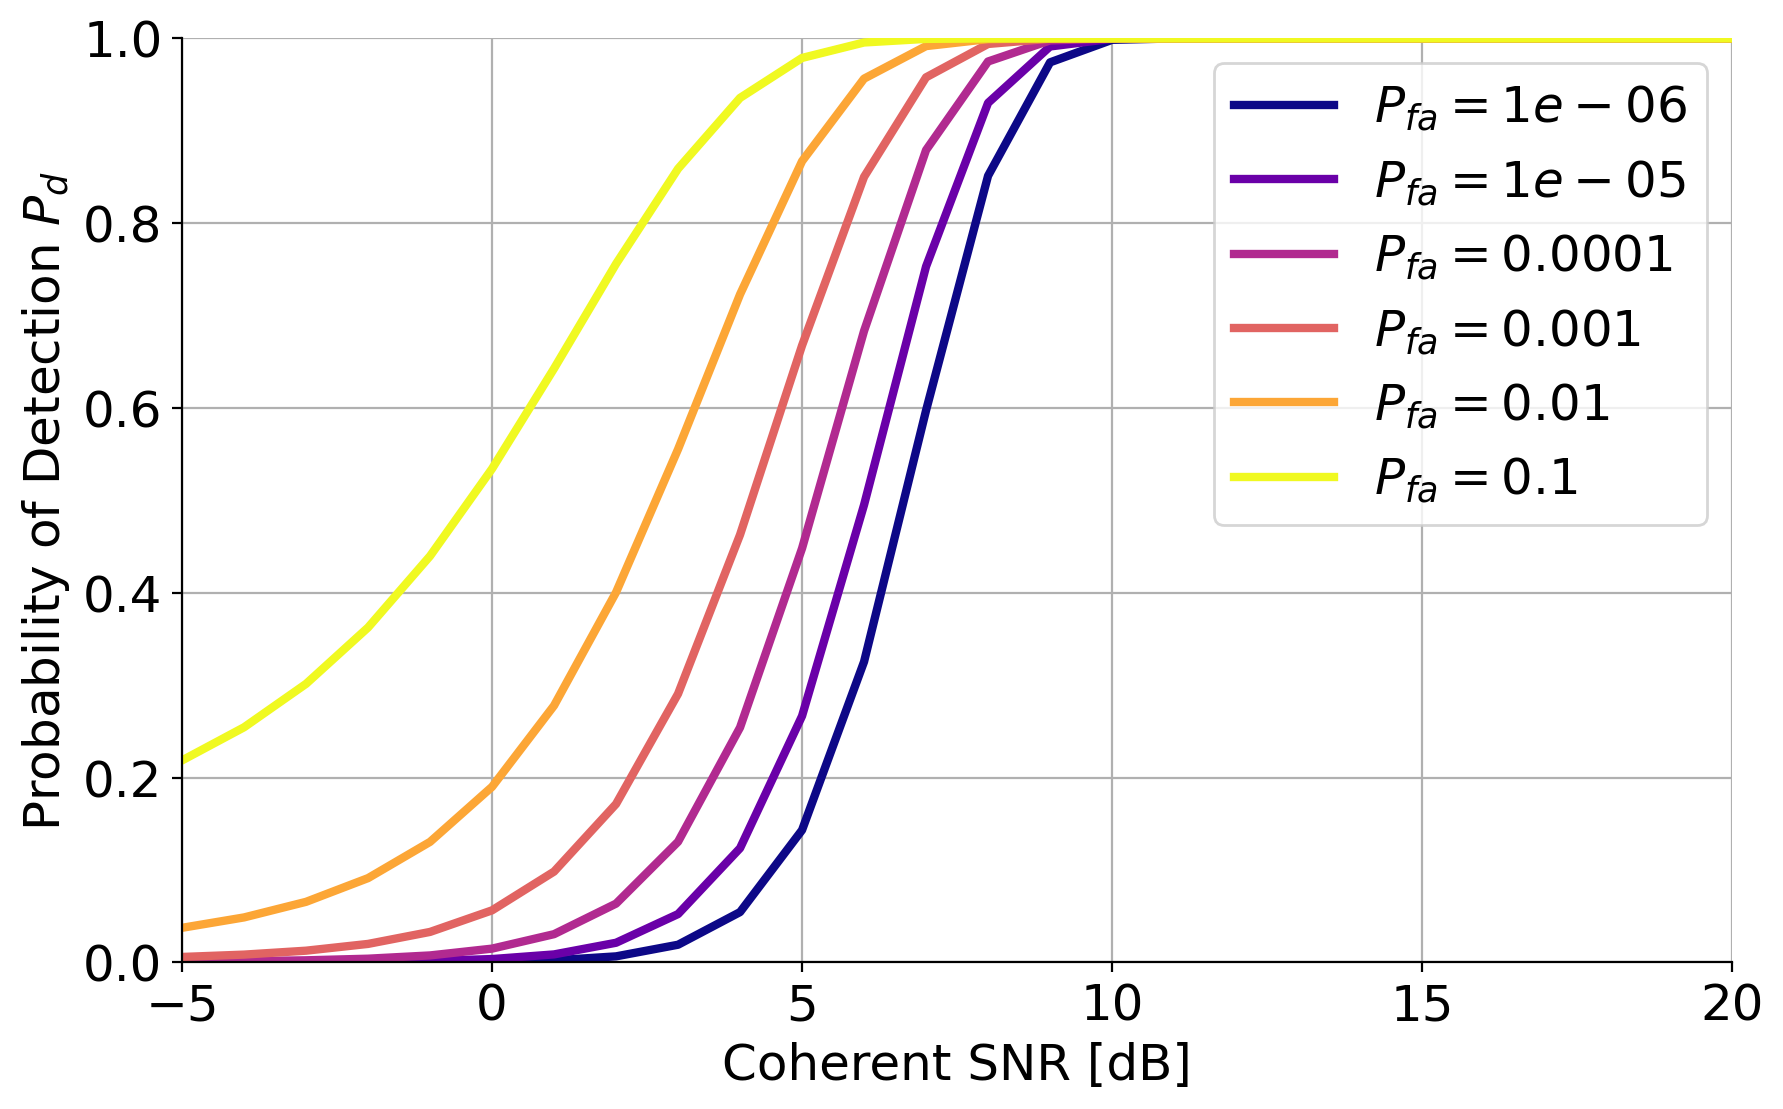

In [ ]:
# probability of detection vs coherent SNR for default M = 1, p_fd = 0.05

SNR_coh_dB_arr = np.arange(-20, 50.2, 0.5)
p_fa_arr = np.array([1e-6, 1e-5, 1e-4, 0.001, 0.01, 0.1])

p_d_coh_arr = np.zeros((len(p_fa_arr), len(SNR_coh_dB_arr)))

M = 10
for i, p_fa in enumerate(p_fa_arr):
    threshold = chi2.ppf(1 - p_fa, 2 * M)  # for M = 1
    print(f"Threshold for Pfa={p_fa}: {threshold:.2f}")
    for j, SNR_coh_dB in enumerate(SNR_coh_dB_arr):
        SNR_coh = 10 ** (SNR_coh_dB / 10)
        lambda_param = M * SNR_coh  # M = 1
        p_d_coh_arr[i, j] = 1 - ncx2.cdf(threshold, 2 * M, lambda_param)

fig = plt.figure(figsize=(10, 6), dpi=200)
ax = fig.add_subplot(1, 1, 1)
plt.rcParams.update({"font.size": 18})
cmap = plt.get_cmap("plasma")
colors = cmap(np.linspace(0, 1, len(p_fa_arr)))
for i, p_fa in enumerate(p_fa_arr):
    p_d = p_d_coh_arr[i, :]
    ax.plot(SNR_coh_dB_arr, p_d, lw=3, color=colors[i], label=f"$P_{{fa}}={p_fa}$")
ax.legend()
ax.set_xlabel("Coherent SNR [dB]")
ax.set_ylabel("Probability of Detection $P_d$")
ax.set_xticks(np.arange(-5, 25, 5))
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_ylim(0, 1)
ax.set_xlim(-5, 20)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid()
plt.show()

Threshold for Pfa=1e-06: 27.63
Threshold for Pfa=1.4873521072935117e-06: 26.84
Threshold for Pfa=2.2122162910704504e-06: 26.04
Threshold for Pfa=3.290344562312671e-06: 25.25
Threshold for Pfa=4.893900918477499e-06: 24.46
Threshold for Pfa=7.2789538439831465e-06: 23.66
Threshold for Pfa=1.082636733874054e-05: 22.87
Threshold for Pfa=1.610262027560939e-05: 22.07
Threshold for Pfa=2.395026619987486e-05: 21.28
Threshold for Pfa=3.5622478902624444e-05: 20.49
Threshold for Pfa=5.2983169062837125e-05: 19.69
Threshold for Pfa=7.880462815669905e-05: 18.90
Threshold for Pfa=0.00011721022975334806: 18.10
Threshold for Pfa=0.0001743328822199989: 17.31
Threshold for Pfa=0.0002592943797404667: 16.52
Threshold for Pfa=0.00038566204211634724: 15.72
Threshold for Pfa=0.0005736152510448681: 14.93
Threshold for Pfa=0.0008531678524172815: 14.13
Threshold for Pfa=0.0012689610031679235: 13.34
Threshold for Pfa=0.0018873918221350976: 12.55
Threshold for Pfa=0.0028072162039411786: 11.75
Threshold for Pfa=0.00

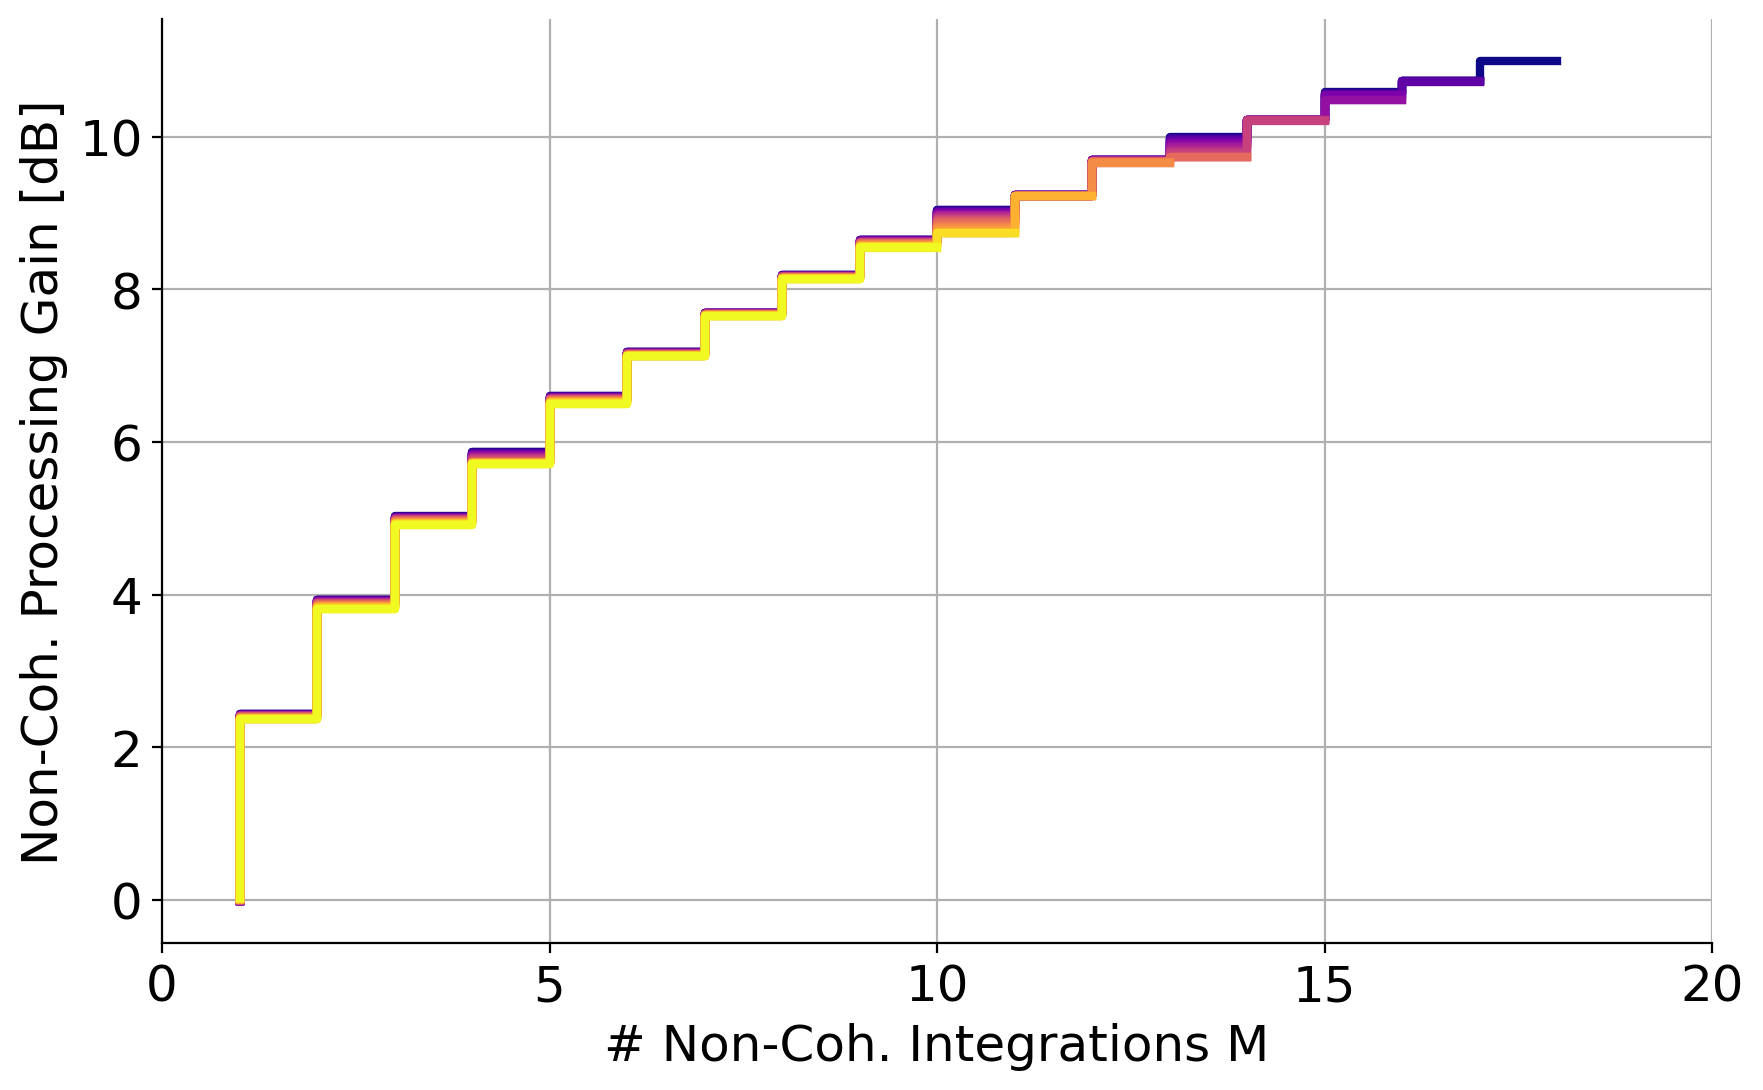

In [19]:
SNR_coh_dB_arr = np.arange(-20, 50.2, 0.5)
p_fa_arr = np.logspace(-6, -1, 30)

p_d_coh_arr = np.zeros((len(p_fa_arr), len(SNR_coh_dB_arr)))

for i, p_fa in enumerate(p_fa_arr):
    threshold = chi2.ppf(1 - p_fa, 2)  # for M = 1
    print(f"Threshold for Pfa={p_fa}: {threshold:.2f}")
    for j, SNR_coh_dB in enumerate(SNR_coh_dB_arr):
        SNR_coh = 10 ** (SNR_coh_dB / 10)
        lambda_param = 1 * SNR_coh  # M = 1
        p_d_coh_arr[i, j] = 1 - ncx2.cdf(threshold, 2, lambda_param)


SNR_coh = 15  # Coherent SNR
SNR_coh_dB = 10 * np.log10(SNR_coh)

M_arr = np.arange(1, 30)

processing_gain_dB_arr = np.nan * np.zeros((len(p_fa_arr), len(M_arr)))

for i, p_fa in enumerate(p_fa_arr):
    for j, M in enumerate(M_arr):
        df = 2 * M  # Degrees of freedom
        threshold = chi2.ppf(1 - p_fa, df)
        lambda_param = M * SNR_coh  # Non-centrality parameter
        p_d = 1 - ncx2.cdf(threshold, df, lambda_param)
        # figure out equiv_SNR that gives same p_d with M = 1
        equiv_SNR_coh_dB = np.interp(p_d, p_d_coh_arr[i, :], SNR_coh_dB_arr)
        if equiv_SNR_coh_dB > np.max(50):
            continue
        # print(p_d, equiv_SNR_coh_dB)
        # equiv_SNR_coh = 10 ** (equiv_SNR_coh_dB / 10)
        processing_gain_dB = equiv_SNR_coh_dB - SNR_coh_dB
        processing_gain_dB_arr[i, j] = processing_gain_dB

fig = plt.figure(figsize=(10, 6), dpi=200)
ax = fig.add_subplot(1, 1, 1)
plt.rcParams.update({"font.size": 18})
cmap = plt.get_cmap("plasma")
colors = cmap(np.linspace(0, 1, len(p_fa_arr)))
for i, p_fa in enumerate(p_fa_arr):
    processing_gain_dB = processing_gain_dB_arr[i, :]
    nan_mask = np.ones_like(processing_gain_dB)
    nan_mask[processing_gain_dB > 35] = np.nan
    ax.step(M_arr, processing_gain_dB * nan_mask, lw=3, color=colors[i], label=f"$P_{{fa}}={p_fa}$")

noncoh_loss_func = lambda M, D_c: (1 + np.sqrt(1 + 9.2 * M / D_c)) / (1 + np.sqrt(1 + 9.2 / D_c))
D_c_func = lambda p_fa, p_d: (special.erfcinv(2 * p_fa) + special.erfcinv(2 * (1 - p_d))) ** 2
threshold = chi2.ppf(1 - p_fa, 2)
p_d = 1 - ncx2.cdf(threshold, 2, SNR_coh)
# D_c = D_c_func(p_fa=p_fa, p_d=p_d)
D_c = 30
print(f"p_d = {p_d:.5f}  D_c = {D_c:.2f}")
# noncoh_gain_dB_arr = 10 * np.log10(M_arr / noncoh_loss_func(M_arr, D_c))
# ax.step(M_arr, noncoh_gain_dB_arr, color="black", lw=1, label="Non-coh. Gain Formula")
# noncoh_gain_dB_arr = 10 * np.log10(M_arr)
# ax.step(M_arr, noncoh_gain_dB_arr, color="red", lw=1, label="Non-coh. Gain Formula")

# noncoh_gain_dB_arr = 6.79 * (1 + .253 * p_d) * (1 + np.log10(1 / p_fa) / 46.6) * np.log10(M_arr) * (1 - 0.14 * np.log10(M_arr) + 0.0183 * np.log10(M_arr)**2)
# ax.step(M_arr, noncoh_gain_dB_arr, color="black", lw=1, label="Non-coh. Gain Formula")

# ax.legend()
ax.set_xlabel("# Non-Coh. Integrations M")
ax.set_ylabel("Non-Coh. Processing Gain [dB]")
ax.set_xticks(np.arange(0, 55, 5))
# ax.set_ylim(0, 35)
ax.set_xlim(0, 20)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid()
plt.show()


In [ ]:
from scipy import special

p_fa_index = 4
p_fa = p_fa_arr[p_fa_index]
threshold = chi2.ppf(1 - p_fa, 2)

# SNR_coh_dB_arr = np.arange(-20, 50.2, 0.1)
M_arr = np.arange(1, 20)

processing_gain_dB_arr = np.nan * np.zeros((len(SNR_coh_dB_arr), len(M_arr)))

for i, SNR_coh_dB in enumerate(SNR_coh_dB_arr):
    SNR_coh = 10 ** (SNR_coh_dB / 10)
    for j, M in enumerate(M_arr):
        df = 2 * M  # Degrees of freedom
        lambda_param = M * SNR_coh  # Non-centrality parameter
        p_d = 1 - ncx2.cdf(threshold, df, lambda_param)
        # figure out equiv_SNR that gives same p_d with M = 1
        equiv_SNR_coh_dB = np.interp(p_d, p_d_coh_arr[p_fa_index, :], SNR_coh_dB_arr)
        if equiv_SNR_coh_dB > 50:
            continue
        # print(p_d, equiv_SNR_coh_dB)
        # equiv_SNR_coh = 10 ** (equiv_SNR_coh_dB / 10)
        processing_gain_dB = equiv_SNR_coh_dB - SNR_coh_dB
        processing_gain_dB_arr[i, j] = processing_gain_dB

fig = plt.figure(figsize=(10, 6), dpi=200)
ax = fig.add_subplot(1, 1, 1)
plt.rcParams.update({"font.size": 18})
cmap = plt.get_cmap("plasma")
colors = cmap(np.linspace(0, 1, len(SNR_coh_dB_arr)))
for i, SNR_coh_dB in enumerate(SNR_coh_dB_arr):
    processing_gain_dB = processing_gain_dB_arr[i, :]
    ax.step(M_arr, processing_gain_dB, lw=3, color=colors[i])

noncoh_loss_func = lambda M, D_c: (1 + np.sqrt(1 + 9.2 * M / D_c)) / (1 + np.sqrt(1 + 9.2 / D_c))
D_c_func = lambda p_fa, p_d: (special.erfcinv(2 * p_fa) + special.erfcinv(2 * (1 - p_d))) ** 2
threshold = chi2.ppf(1 - p_fa, 2)
p_d = 1 - ncx2.cdf(threshold, 2, SNR_coh)
D_c = D_c_func(p_fa=0.01, p_d=p_d)
print(f"p_d = {p_d:.5f}  D_c = {D_c:.2f}")
noncoh_gain_dB_arr = 10 * np.log10(M_arr / noncoh_loss_func(M_arr, D_c))
ax.step(M_arr, noncoh_gain_dB_arr, color="black", lw=1, label="Non-coh. Gain")

# ax.legend()
ax.set_xlabel("# Non-Coh. Integrations M")
ax.set_ylabel("Non-Coh. Processing Gain [dB]")
ax.set_xticks(np.arange(0, 55, 5))
# ax.set_ylim(0, 35)
ax.set_xlim(0, 20)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid()
plt.show()


In [ ]:
print(10 * np.log10(25))